 🌎 GPGN268 - Geophysical Data Analysis
- **Instructor:** Bia Villas Boas  
- **TA:** Seunghoo Kim

## Lecture 14: Introduction to pandas II.

#### 🎯 Learning Objectives from this Lecture:
- Select individual values from a Pandas dataframe.
- Select entire rows or entire columns from a dataframe.
- Select a subset of both rows and columns from a dataframe in a single operation.
- Select a subset of a dataframe by a single Boolean criterion.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
path = '/Users/bia/work/classes/GPGN268/coursework-villasboas/ds01-well-log/data/iodp-logging-data/EXP372/U1517A/372-U1517A_res-phase-nscope.csv'

# We can specify directly when reading which column to use as index column
df = pd.read_csv(path, skiprows=[0, 1, 2, 3, 5], index_col='DEPTH_LSF')
df

,P16B,P16H,P16L,P22B,P22H,P22L,P28B,P28H,P28L,P34B,P34H,P34L,P40B,P40H,P40L
DEPTH_LSF,,,,,,,,,,,,,,,
0.1348,0.609138,0.606420,0.609138,0.625390,0.628182,0.625390,0.633311,0.642043,0.633311,0.635440,0.646374,0.635440,0.640069,0.650177,0.640069
0.2872,0.627580,0.606823,0.627579,0.646545,0.632340,0.646545,0.654598,0.649771,0.654598,0.654733,0.655505,0.654733,0.657815,0.659040,0.657815
0.4396,0.644199,0.610627,0.644199,0.663118,0.632921,0.663118,0.674138,0.650050,0.674138,0.678495,0.658393,0.678495,0.684064,0.664154,0.684064
0.5920,0.663892,0.619708,0.663892,0.681017,0.637017,0.681017,0.693011,0.653297,0.693011,0.699174,0.662530,0.699174,0.704357,0.666172,0.704357
0.7444,0.682845,0.630840,0.682845,0.697899,0.645322,0.697899,0.709838,0.659337,0.709838,0.717195,0.668764,0.717195,0.722439,0.674389,0.722439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186.2152,1.349504,1.321876,1.365414,1.367666,1.349495,1.378745,1.385877,1.375210,1.392777,1.399951,1.391715,1.405571,1.409557,1.401155,1.415531
186.3676,1.307980,1.264115,1.329541,1.327183,1.286108,1.349225,1.350870,1.316730,1.371008,1.374388,1.345850,1.392854,1.392158,1.364525,1.411478
186.5200,1.283353,1.242980,1.300715,1.326024,1.298547,1.340192,1.358904,1.344285,1.367395,1.381087,1.372510,1.386490,1.402996,1.395565,1.408120


### Note about Pandas DataFrames/Series
A DataFrame is a collection of Series; The DataFrame is the way Pandas represents a table, and Series is the data-structure Pandas use to represent a column.

Pandas is built on top of the Numpy library, which in practice means that most of the methods defined for Numpy Arrays apply to Pandas Series/DataFrames.

What makes Pandas so attractive is the powerful interface to access individual records of the table, proper handling of missing values, and relational-databases operations between DataFrames.

## Selecting values

To access the values of the index column, we can do:

In [37]:
df.index

Float64Index([  0.1348,   0.2872,   0.4396,    0.592,   0.7444,   0.8968,
                1.0492,   1.2016,    1.354,   1.5064,
              ...
              185.4532, 185.6056,  185.758, 185.9104, 186.0628, 186.2152,
              186.3676,   186.52, 186.6724, 186.8248],
             dtype='float64', name='DEPTH_LSF', length=1226)

To access a value at the position [i,j] of a DataFrame, we have two options, depending on what is the meaning of i in use. Remember that a DataFrame provides an index as a way to identify the rows of the table; a row, then, has a position inside the table as well as a label, which uniquely identifies its entry in the DataFrame.

### Use DataFrame.iloc[..., ...] to select values by their (entry) position
- Can specify location by numerical index analogously to 2D version of character selection in strings.

In [8]:
# Selects the value in the first row and first column
df.iloc[0, 0]

0.6091384

### Use DataFrame.loc[..., ...] to select values by their (entry) label.
- Can specify location by row and/or column name/value.

In [20]:
# First value is the "index" value (i.e., depth) 
# and second value is the row label
df.loc[186.5200, "P16B"]

1.283353

In [22]:
# All rows and P22H column
df.loc[:, "P22H"]

DEPTH_LSF
0.1348      0.628182
0.2872      0.632340
0.4396      0.632921
0.5920      0.637017
0.7444      0.645322
              ...   
186.2152    1.349495
186.3676    1.286108
186.5200    1.298547
186.6724    1.272658
186.8248    1.272654
Name: P22H, Length: 1226, dtype: float64

### Select multiple columns or rows using DataFrame.loc and a named slice

In [24]:
df.loc[0.2872:0.7444, "P16L":"P28B"]

,P16L,P22B,P22H,P22L,P28B
DEPTH_LSF,,,,,
0.2872,0.627579,0.646545,0.632340,0.646545,0.654598
0.4396,0.644199,0.663118,0.632921,0.663118,0.674138
0.5920,0.663892,0.681017,0.637017,0.681017,0.693011
0.7444,0.682845,0.697899,0.645322,0.697899,0.709838


👀 In the above code, we discover that slicing using loc is inclusive at both ends, which differs from slicing using iloc, where slicing indicates everything up to but not including the final index.

### Result of slicing can be used in further operations.
- All the statistical operators that work on entire dataframes work the same way on slices. For example, calculate max of a slice.

In [36]:
# Return the maximum for each column
df.loc[0.2872:0.7444, "P16L":"P28B"].max()

P16L    0.682845
P22B    0.697899
P22H    0.645322
P22L    0.697899
P28B    0.709838
dtype: float64

### Use comparisons to select data based on value.
- Comparison is applied element by element.
- Returns a similarly-shaped dataframe of True and False.

In [97]:
subset = df.loc[:, "P16B":"P16L"]
subset

,P16B,P16H,P16L
DEPTH_LSF,,,
0.1348,0.609138,0.606420,0.609138
0.2872,0.627580,0.606823,0.627579
0.4396,0.644199,0.610627,0.644199
0.5920,0.663892,0.619708,0.663892
0.7444,0.682845,0.630840,0.682845
...,...,...,...
186.2152,1.349504,1.321876,1.365414
186.3676,1.307980,1.264115,1.329541
186.5200,1.283353,1.242980,1.300715


In [98]:
subset > 1

,P16B,P16H,P16L
DEPTH_LSF,,,
0.1348,False,False,False
0.2872,False,False,False
0.4396,False,False,False
0.5920,False,False,False
0.7444,False,False,False
...,...,...,...
186.2152,True,True,True
186.3676,True,True,True
186.5200,True,True,True


### Select values using a Boolean mask.
- A frame full of Booleans is sometimes called a mask because of how it can be used.

In [99]:
mask = subset > 1
subset[mask]

,P16B,P16H,P16L
DEPTH_LSF,,,
0.1348,NaN,NaN,NaN
0.2872,NaN,NaN,NaN
0.4396,NaN,NaN,NaN
0.5920,NaN,NaN,NaN
0.7444,NaN,NaN,NaN
...,...,...,...
186.2152,1.349504,1.321876,1.365414
186.3676,1.307980,1.264115,1.329541
186.5200,1.283353,1.242980,1.300715


- This returnsthe value where the mask is true, and NaN (Not a Number) where it is false.
- This is useful because NaNs are ignored by operations like max, min, average, etc.

In [100]:
subset[mask].describe()

,P16B,P16H,P16L
count,1149.000000,1103.000000,1149.000000
mean,1.380994,1.367526,1.396114
std,0.160090,0.168516,0.158897
min,1.001213,1.004278,1.001387
25%,1.288997,1.273459,1.299749
50%,1.349567,1.338851,1.363523
75%,1.478018,1.471015,1.491029
max,2.068212,2.068210,2.018047


#### 🤔 How does that compare with `subset.describe()`?

### Make quick plots for data inspection with pandas

A pandas DataFrame has a method `plot()` which allows quick visualization. Note that for final, you should still use matplotlib and customize your graphs for optimal presentation, but plotting straight from pandas is a great way to take a first look at your data.

<AxesSubplot: xlabel='DEPTH_LSF'>

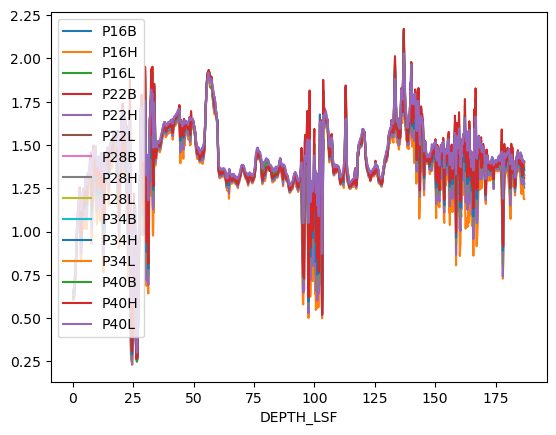

In [35]:
df.plot()

<AxesSubplot: xlabel='DEPTH_LSF'>

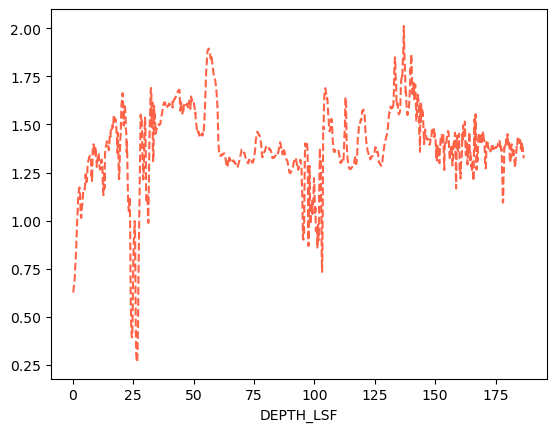

In [111]:
# You can also select only one variable to plot
df.loc[:, 'P22L'].plot(color='tomato', ls='--')

### Change the label of the index column with index.name

In [119]:
df.index.name = 'Depth'

In [120]:
df

,P16B,P16H,P16L,P22B,P22H,P22L,P28B,P28H,P28L,P34B,P34H,P34L,P40B,P40H,P40L
Depth,,,,,,,,,,,,,,,
0.1348,0.609138,0.606420,0.609138,0.625390,0.628182,0.625390,0.633311,0.642043,0.633311,0.635440,0.646374,0.635440,0.640069,0.650177,0.640069
0.2872,0.627580,0.606823,0.627579,0.646545,0.632340,0.646545,0.654598,0.649771,0.654598,0.654733,0.655505,0.654733,0.657815,0.659040,0.657815
0.4396,0.644199,0.610627,0.644199,0.663118,0.632921,0.663118,0.674138,0.650050,0.674138,0.678495,0.658393,0.678495,0.684064,0.664154,0.684064
0.5920,0.663892,0.619708,0.663892,0.681017,0.637017,0.681017,0.693011,0.653297,0.693011,0.699174,0.662530,0.699174,0.704357,0.666172,0.704357
0.7444,0.682845,0.630840,0.682845,0.697899,0.645322,0.697899,0.709838,0.659337,0.709838,0.717195,0.668764,0.717195,0.722439,0.674389,0.722439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186.2152,1.349504,1.321876,1.365414,1.367666,1.349495,1.378745,1.385877,1.375210,1.392777,1.399951,1.391715,1.405571,1.409557,1.401155,1.415531
186.3676,1.307980,1.264115,1.329541,1.327183,1.286108,1.349225,1.350870,1.316730,1.371008,1.374388,1.345850,1.392854,1.392158,1.364525,1.411478
186.5200,1.283353,1.242980,1.300715,1.326024,1.298547,1.340192,1.358904,1.344285,1.367395,1.381087,1.372510,1.386490,1.402996,1.395565,1.408120
